In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
DF=df.copy()

In [5]:
df.shape

(8523, 12)

In [6]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


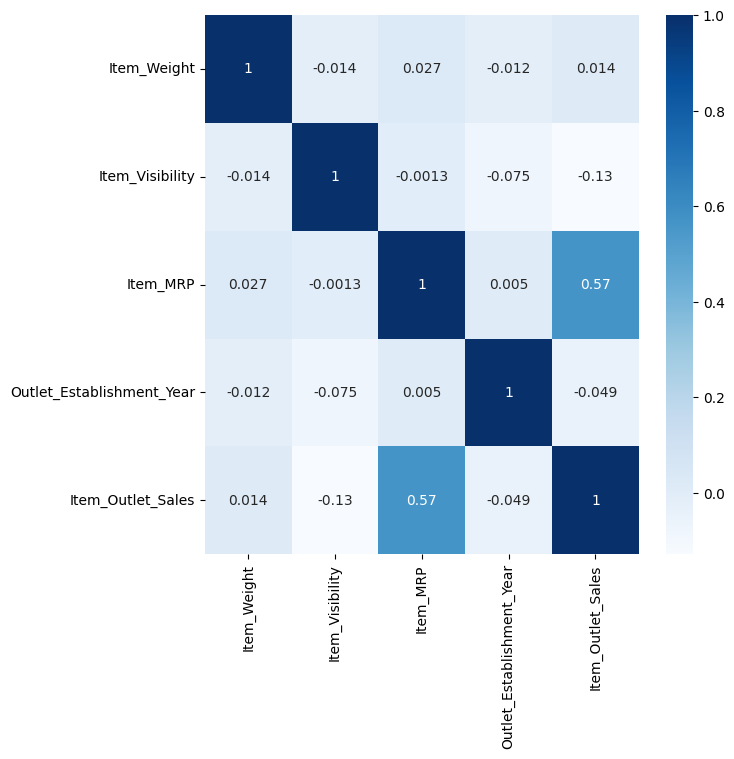

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

In [10]:
duplicated_df=df[df.duplicated()]
duplicated_df.shape

(0, 12)

No duplicate rows are present in the data set.

In [11]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **EDA**

In [12]:
col=df.select_dtypes(include=['object'])
col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def find_object_correlation(dataframe):
    object_columns = dataframe.select_dtypes(include=['object']).columns
    correlation_matrix = pd.DataFrame(np.zeros((len(object_columns), len(object_columns))), index=object_columns, columns=object_columns)

    for i in range(len(object_columns)):
        for j in range(i, len(object_columns)):
            feature1 = dataframe[object_columns[i]]
            feature2 = dataframe[object_columns[j]]
            correlation = cramers_v(feature1, feature2)
            correlation_matrix.loc[object_columns[i], object_columns[j]] = correlation
            correlation_matrix.loc[object_columns[j], object_columns[i]] = correlation

    return correlation_matrix

# Example usage
# Assuming you have a DataFrame called 'df' with your data
correlation_matrix = find_object_correlation(df)
print(correlation_matrix)


                      Item_Identifier  Item_Fat_Content  Item_Type  \
Item_Identifier              1.000000          0.447767   0.904776   
Item_Fat_Content             0.447767          1.000000   0.209473   
Item_Type                    0.904776          0.209473   1.000000   
Outlet_Identifier            0.000000          0.000000   0.000000   
Outlet_Size                  0.000000          0.000000   0.000000   
Outlet_Location_Type         0.000000          0.000000   0.000000   
Outlet_Type                  0.000000          0.004249   0.000000   

                      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
Item_Identifier                0.000000     0.000000              0.000000   
Item_Fat_Content               0.000000     0.000000              0.000000   
Item_Type                      0.000000     0.000000              0.000000   
Outlet_Identifier              1.000000     0.999673              0.999589   
Outlet_Size                    0.999673     1.000

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values in Item_Weight**

In [15]:
df.value_counts('Item_Weight')

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
5.735      2
6.520      1
5.400      1
7.685      1
9.420      1
Length: 415, dtype: int64

In [16]:
df['Item_Weight'].nunique()

415

In [17]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [18]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'), inplace=True)

In [19]:
DF=df.copy()

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
Nan_df=df.loc[df.isnull().any(axis=1)]
Nan_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [22]:
Nan_df.groupby(['Outlet_Type'])['Outlet_Location_Type'].value_counts()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
Supermarket Type1  Tier 2                  1855
Name: Outlet_Location_Type, dtype: int64

## **Working with the copy of data for handling the missing value in Outlet_Size.**

In [23]:
import statistics

In [24]:
mode_size=DF.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].agg(lambda x: statistics.mode(x) if len(x) > 0 else 'Unknown')

In [25]:
print(mode_size)

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   Small
                   Tier 3                     NaN
Supermarket Type1  Tier 1                  Medium
                   Tier 2                     NaN
                   Tier 3                    High
Supermarket Type2  Tier 3                  Medium
Supermarket Type3  Tier 3                  Medium
Name: Outlet_Size, dtype: object


In [26]:
DF.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
DF_NO_Nan=DF.dropna()

In [28]:
DF_NO_Nan.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
mode_size_DF_without_Nan=DF_NO_Nan.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].agg(lambda x: statistics.mode(x) if len(x) > 0 else 'Unknown')
print(mode_size_DF_without_Nan)

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   Small
Supermarket Type1  Tier 1                  Medium
                   Tier 2                   Small
                   Tier 3                    High
Supermarket Type2  Tier 3                  Medium
Supermarket Type3  Tier 3                  Medium
Name: Outlet_Size, dtype: object


In [30]:
DF.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

Got the insight that all the values in
the **Outlet_Size** corresponding to **Grocery Store in Tier 3** are Nan values.So We are forced to handling the missing in this combination with the mode of Grocery Store of Tier 1.

In the case of **Supermarket Type 1 in Tier 2** the mode after droping missing values in "Small" so we handle the missing value "Small".

## **Back to the original data**

In [31]:
df.groupby(["Outlet_Type",'Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.mode())

Outlet_Type        Outlet_Location_Type   
Grocery Store      Tier 1                0     Small
Supermarket Type1  Tier 1                0    Medium
                                         1     Small
                   Tier 2                0     Small
                   Tier 3                0      High
Supermarket Type2  Tier 3                0    Medium
Supermarket Type3  Tier 3                0    Medium
Name: Outlet_Size, dtype: object

In [32]:
df=df.fillna(df.groupby(["Outlet_Type",'Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.mode()).iloc[0])

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
df.value_counts('Outlet_Size')

Outlet_Size
Small     4798
Medium    2793
High       932
dtype: int64

**Handling Outliers**

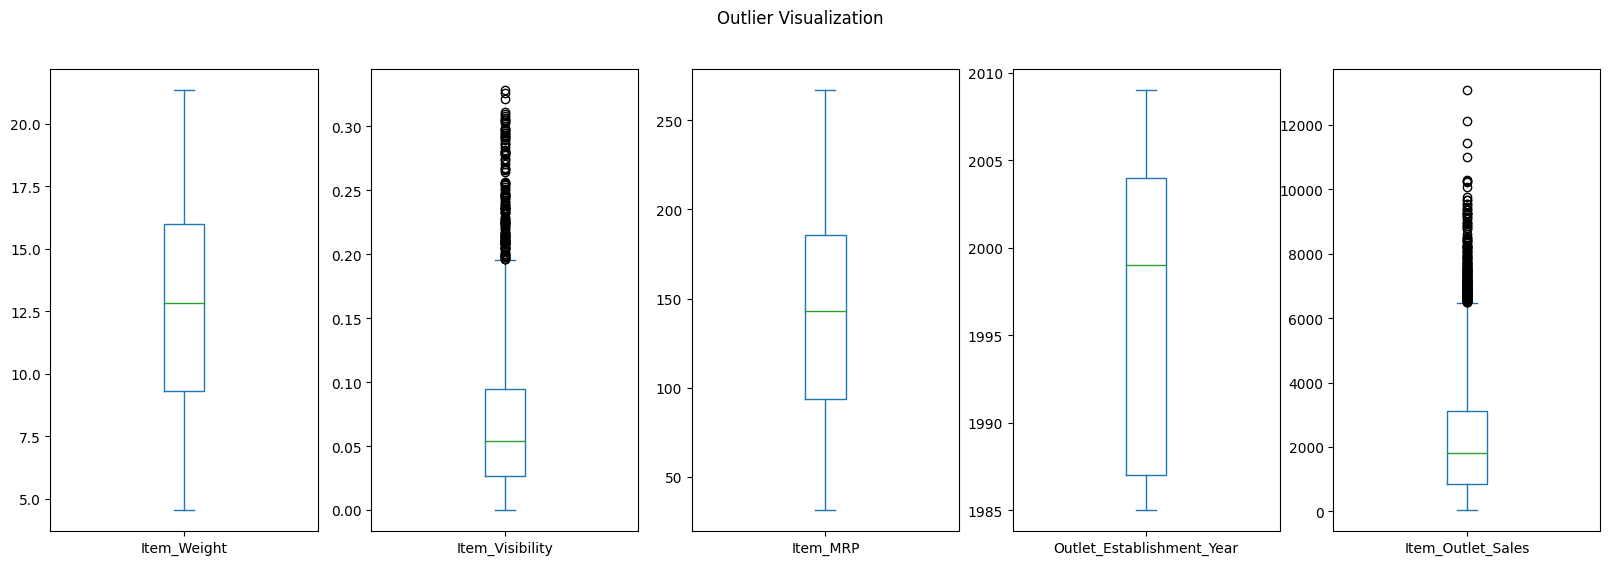

In [35]:
df.plot(subplots=True,kind="box",figsize=(20,6),title='Outlier Visualization')
plt.show()

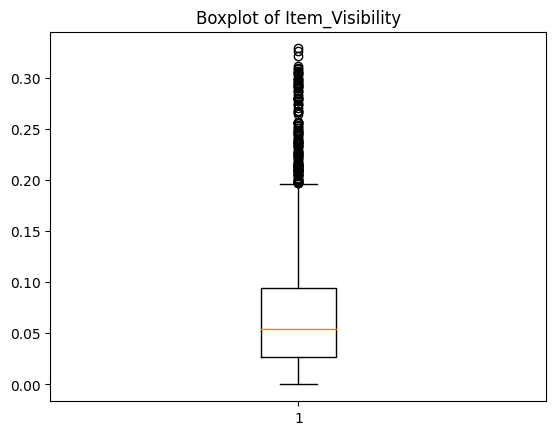

In [36]:
#handling outliers in Item_Visibility
plt.title("Boxplot of Item_Visibility")
plt.boxplot(df['Item_Visibility'])
plt.show()

In [37]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [38]:
Q1=np.percentile(df['Item_Visibility'],25,interpolation='midpoint')
Q3=np.percentile(df['Item_Visibility'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
l=[]
for i in df['Item_Visibility']:
  if(i>Max)or(i<Min):
    l.append(i)

len(l)

144

Since the no.of outliers in **Item_Visibility** in 144 ,which is very less as compared to the total data points.
So droping those outliers.

In [39]:
rows_to_drop = []
for index, value in enumerate(df['Item_Visibility']):
    if (value > Max) or (value < Min):
        rows_to_drop.append(index)

df = df.drop(rows_to_drop)


In [40]:
df.shape

(8379, 12)

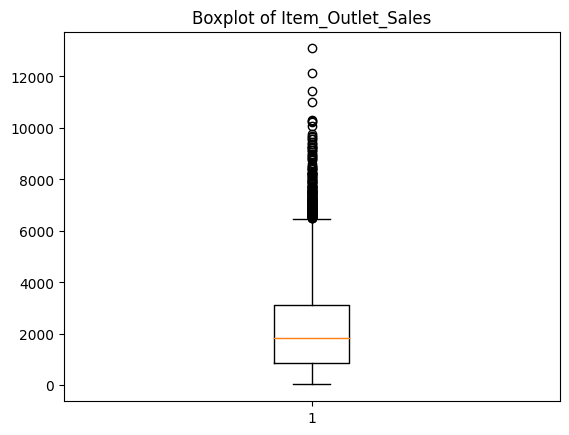

In [41]:
#handling outliers in Item_Outlet_Sales
plt.title("Boxplot of Item_Outlet_Sales")
plt.boxplot(df['Item_Outlet_Sales'])
plt.show()

Values in Item_Outlet_Sales cannot be considered as Outliers .So leave as it is.





In [42]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **ENCODING**

In [43]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
df.Item_Fat_Content.nunique()

5

In [45]:
df.Item_Identifier.nunique()

1559

In [46]:
df.Item_Type.nunique()

16

In [47]:
df.Outlet_Identifier.nunique()

10

In [48]:
df.Outlet_Size.nunique()

3

In [49]:
df.Outlet_Location_Type.nunique()

3

In [50]:
df.Outlet_Type.nunique()

4

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()
for i in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']:
  df[i]=le.fit_transform(df[i])

In [53]:
for i in ['Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  df=pd.get_dummies(df,columns=[i])

In [54]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,1,0.016047,4,249.8092,9,1999,3735.1380,0,1,0,1,0,0,0,1,0,0
1,8,5.920,2,0.019278,14,48.2692,3,2009,443.4228,0,1,0,0,0,1,0,0,1,0
2,662,17.500,1,0.016760,10,141.6180,9,1999,2097.2700,0,1,0,1,0,0,0,1,0,0
3,1121,19.200,2,0.000000,6,182.0950,0,1998,732.3800,0,0,1,0,0,1,1,0,0,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,994.7052,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,2778.3834,1,0,0,0,0,1,0,1,0,0
8519,897,8.380,2,0.046982,0,108.1570,7,2002,549.2850,0,0,1,0,1,0,0,1,0,0
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,1193.1136,0,0,1,0,1,0,0,1,0,0
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1845.5976,0,1,0,0,0,1,0,0,1,0


In [55]:
df.dtypes

Item_Identifier                    int64
Item_Weight                      float64
Item_Fat_Content                   int64
Item_Visibility                  float64
Item_Type                          int64
Item_MRP                         float64
Outlet_Identifier                  int64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [56]:
y=df['Item_Outlet_Sales']
x=df.drop('Item_Outlet_Sales',axis=1)

**Splitting the data into train and test data**

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [58]:
x_train.shape

(6703, 18)

In [59]:
x_test.shape

(1676, 18)

In [60]:
y_train.shape

(6703,)

## **MODELLING**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
#Linear Regression
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))



MSE is : 1252846.222811815
R squared value is : 0.5575834653470785


In [63]:
#decision tree regression
dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)
predictions=dr.predict(x_test)
print('MSE is :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))



MSE is : 2405953.5996076935
R squared value is : 0.1503876256375618


MSE value of linear regression is less than MSE value of Decision tree regression ,so the better model is Linear regresssion.

## **Preprocessing the test data.**

In [64]:
test_df=pd.read_csv("/content/test_AbJTz2l.csv")
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
test_DF=test_df.copy()

In [66]:
test_df.shape

(5681, 11)

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [68]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [69]:
duplicated_df=test_df[test_df.duplicated()]
duplicated_df.shape

(0, 11)

In [70]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [71]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [72]:
test_df['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [73]:
test_df['Item_Weight'].fillna(test_df.groupby('Item_Type')['Item_Weight'].transform('median'), inplace=True)

In [74]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [75]:
Nan_df=test_df.loc[test_df.isnull().any(axis=1)]
Nan_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [76]:
Nan_df.groupby(['Outlet_Type'])['Outlet_Location_Type'].value_counts()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   370
Supermarket Type1  Tier 2                  1236
Name: Outlet_Location_Type, dtype: int64

# Working with the copy of data for handling the missing value in Outlet_Size.

In [77]:
test_DF=test_df.copy()

In [78]:
mode_size=test_DF.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].agg(lambda x: statistics.mode(x) if len(x) > 0 else 'Unknown')

In [79]:
print(mode_size)

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   Small
                   Tier 3                     NaN
Supermarket Type1  Tier 1                  Medium
                   Tier 2                     NaN
                   Tier 3                    High
Supermarket Type2  Tier 3                  Medium
Supermarket Type3  Tier 3                  Medium
Name: Outlet_Size, dtype: object


This the same case as in the train data

In [80]:
test_df=test_df.fillna(test_df.groupby(["Outlet_Type",'Outlet_Location_Type'])['Outlet_Size'].apply(lambda x: x.mode()).iloc[0])

In [81]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## **Handling Ouliers**

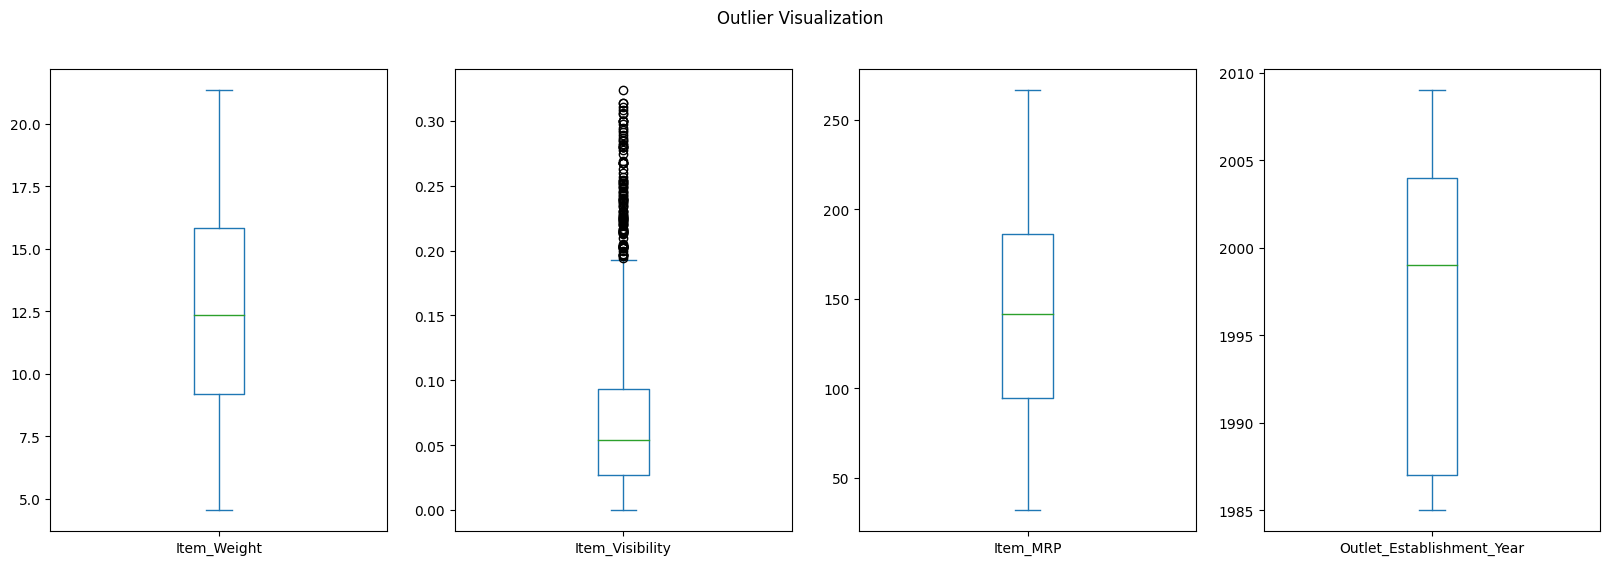

In [82]:
test_df.plot(subplots=True,kind="box",figsize=(20,6),title='Outlier Visualization')
plt.show()

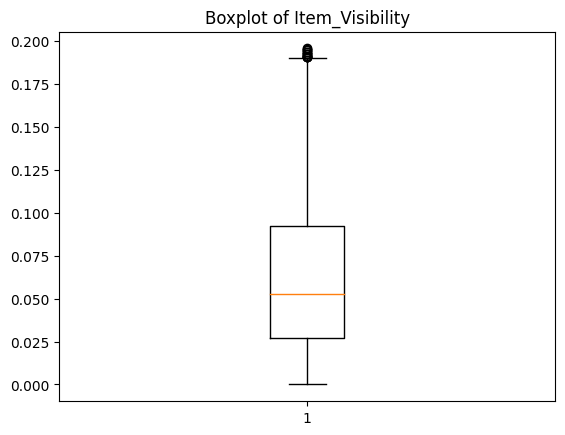

In [83]:
#handling outliers in Item_Visibility
plt.title("Boxplot of Item_Visibility")
plt.boxplot(df['Item_Visibility'])
plt.show()

In [84]:
df['Item_Visibility'].describe()

count    8379.000000
mean        0.063061
std         0.046130
min         0.000000
25%         0.026789
50%         0.052729
75%         0.092277
max         0.195721
Name: Item_Visibility, dtype: float64

In [85]:
Q1=np.percentile(test_df['Item_Visibility'],25,interpolation='midpoint')
Q3=np.percentile(test_df['Item_Visibility'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
l1=[]
for i in test_df['Item_Visibility']:
  if(i>Max)or(i<Min):
    l1.append(i)

len(l1)

113

In [86]:
rows_to_drop = []
for index, value in enumerate(test_df['Item_Visibility']):
    if (value > Max) or (value < Min):
        rows_to_drop.append(index)

test_df =test_df.drop(rows_to_drop)

In [87]:
test_df.shape

(5568, 11)

In [88]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.800,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


## **ENCODING**

In [89]:
le=LabelEncoder()
for i in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']:
  test_df[i]=le.fit_transform(test_df[i])

In [90]:
for i in ['Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  test_df=pd.get_dummies(test_df,columns=[i])

**Now we predict the Item_Outlet_Sales of test data with the linear regression model**

In [91]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
test_pred=model.predict(test_df)

In [92]:
test_df['Item_Outlet_Sales']=test_pred

In [93]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,1101,20.750,1,0.007565,13,107.8622,9,1999,0,1,0,1,0,0,0,1,0,0,1879.907443
1,1065,8.300,4,0.038428,4,87.3198,2,2007,0,0,1,0,1,0,0,1,0,0,1591.141807
2,1404,14.600,1,0.099575,11,241.7538,0,1998,0,0,1,0,0,1,1,0,0,0,1930.510965
3,808,7.315,1,0.015388,13,155.0340,2,2007,0,0,1,0,1,0,0,1,0,0,2626.577277
4,1182,12.800,2,0.118599,4,234.2300,5,1985,0,1,0,0,0,1,0,0,0,1,5177.621930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,0,0,1,1,0,0,0,1,0,0,2308.041105
5677,306,7.600,2,0.142991,15,169.1448,3,2009,0,1,0,0,0,1,0,0,1,0,2427.230431
5678,1410,10.000,1,0.073529,8,118.7440,7,2002,0,0,1,0,1,0,0,1,0,0,1805.312253
5679,517,15.300,2,0.000000,3,214.6218,2,2007,0,0,1,0,1,0,0,1,0,0,3574.992473
